In [149]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "rR9EYifG337ntSf6jIZudcMML"
consumer_secret = "C7CpZDCj8kLj6EWtiW6vyrhi41OAcVpIQXTpsh6eryoFxtk62J"
access_token = "930145429223813121-N5RznIrke8TcHiW9kotbrNy7bOMb4ye"
access_token_secret = "MuldQw0WWHeLdCBvspaCcRM3u9zvk4w8NOPYdxIZPBqDH"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [150]:
# Target User Account
target_user = ("@BBC","@CBS","@CNN","@Fox","@NYTimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiments_array = []
sentiment_avg_array = []

In [151]:
# Loop through all target users
for target in target_user:
    
    counter = 1

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
                # Set the new oldest_tweet value
                oldest_tweet = int(tweet["id_str"]) - 1
                
                # Add sentiments for each tweet into an array
                sentiments_array.append({"Date": tweet["created_at"],
                           "User": target,           
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                sentiments_pd = pd.DataFrame.from_dict(sentiments_array)
            
                # Add to counter 
                counter = counter + 1
        
   

                
    # Store the Average Sentiments
    sentiment_avg_array.append({"User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Negative": np.mean(negative_list),
        "Neutral": np.mean(neutral_list),
        "Tweet Count": len(compound_list)})
    sentiment_avg_pd = pd.DataFrame.from_dict(sentiment_avg_array)



In [152]:
sentiment_avg_pd  

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.246161,0.030528,0.845222,0.124278,36,@BBC
1,0.285787,0.015875,0.847844,0.136313,32,@CBS
2,-0.034319,0.095057,0.820434,0.084566,53,@CNN
3,0.029256,0.082179,0.836154,0.081641,39,@Fox
4,0.014243,0.096915,0.812043,0.091064,47,@NYTimes


In [153]:
sentiments_pd = sentiments_pd.set_index('User')
BBC = sentiments_pd.loc['@BBC']
CBS = sentiments_pd.loc['@CBS']
CNN = sentiments_pd.loc['@CNN']
FOX = sentiments_pd.loc['@Fox']
NYTimes = sentiments_pd.loc['@NYTimes']

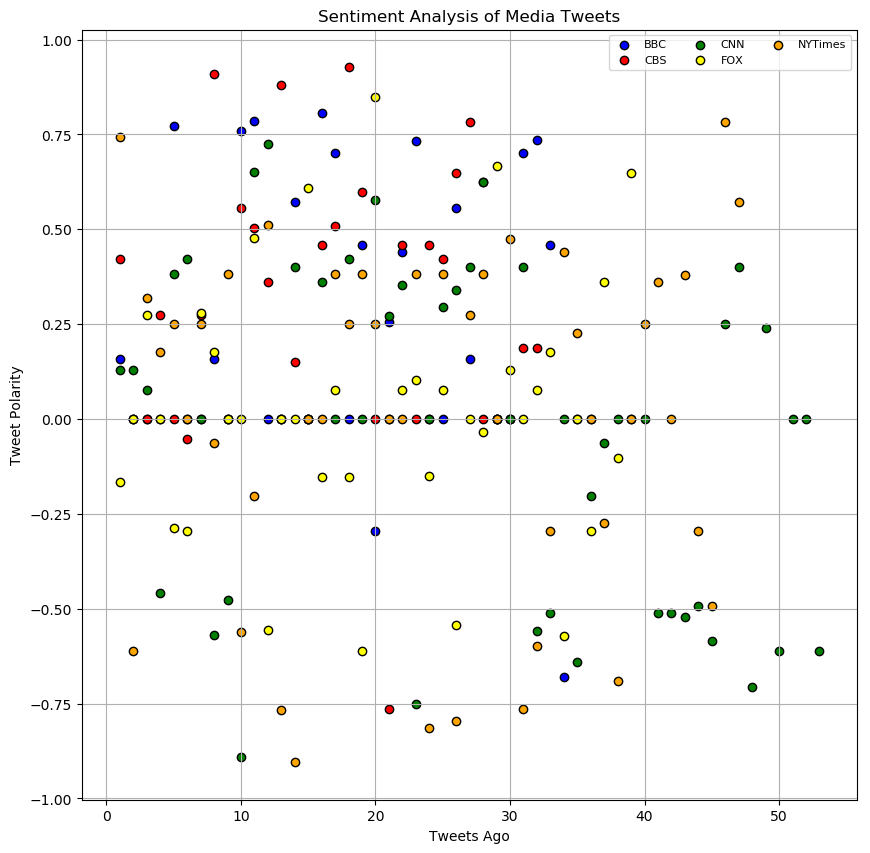

In [154]:
# Plot the sentiments
plt.figure(figsize = (10,10))
BBC = plt.scatter(BBC['Tweets Ago'], BBC['Compound'], color='blue', edgecolors='black')
CBS = plt.scatter(CBS['Tweets Ago'], CBS['Compound'], color='red', edgecolors='black')
CNN = plt.scatter(CNN['Tweets Ago'], CNN['Compound'], color='green', edgecolors='black')
FOX = plt.scatter(FOX['Tweets Ago'], FOX['Compound'], color='yellow', edgecolors='black')
NYTimes = plt.scatter(NYTimes['Tweets Ago'], NYTimes['Compound'], color='orange', edgecolors='black')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets')
plt.legend((BBC,CBS,CNN,FOX,NYTimes),('BBC', 'CBS', 'CNN', 'FOX', 'NYTimes'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.grid()
plt.show()

In [155]:
sentiment_avg_pd

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.246161,0.030528,0.845222,0.124278,36,@BBC
1,0.285787,0.015875,0.847844,0.136313,32,@CBS
2,-0.034319,0.095057,0.820434,0.084566,53,@CNN
3,0.029256,0.082179,0.836154,0.081641,39,@Fox
4,0.014243,0.096915,0.812043,0.091064,47,@NYTimes


In [167]:
x = sentiment_avg_pd['User']
y = sentiment_avg_pd['Compound']

TypeError: cannot convert the series to <class 'int'>

In [166]:
 
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, objects)
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment Based on Twitter')
 
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
# Plot the sentiments
plt.figure(figsize = (10,10))
rural = plt.scatter(rural['Total Rides'], rural['Average Fare'], s=s, color='gold', edgecolors='black')
urban = plt.scatter(urban['Total Rides'], urban['Average Fare'], s=s, color='lightcoral', edgecolors='black')
suburban = plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s=s, color='lightskyblue', edgecolors='black')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend((rural, urban, suburban),('Rural', 'Urban','Suburban'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.grid()
plt.show()